In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import PIL
import bm3d
from pathlib import Path
from skimage import io, img_as_float
import os
from collections import defaultdict

: 

In [49]:
test_image_denoise = r"D:\VIP Cup\Dataset\ICIP training data\0\RawDataQA (25)\RawDataQA25 (172).tiff"
test_image_pipeline = r"Dataset/ICIP_test_data_final/RawDataQA (10)/(157).tif"
output_dir = r"D:\VIP Cup\resullts_to_report"

In [139]:

def bm3d_denoise(noisy_image, npsd_sigma):

    noisy_oct = img_as_float(io.imread(test_image_pipeline))
    sigma = npsd_sigma
    bm3d_denoised = bm3d.bm3d(noisy_oct, sigma_psd=sigma, stage_arg=bm3d.BM3DStages.ALL_STAGES)
    return bm3d_denoised

In [67]:
import numpy as np
from numpy.linalg import svd
from PIL import Image
import math

def get_svd_image_from_array(A):

    # Remember image size
    n = len(A)

    # Take SVD
    U, S, V = svd(A)

    threshold = 4/np.sqrt(3)
    filter = (S > threshold)*1 
    filtered_S = np.multiply(S, filter)

    # Initialize blank image
    final_img = np.zeros((n, n))
        
    for i in range(n):
        matrix = S[i]*np.outer(U[:,i],V[i])
        final_img += matrix
    
    return final_img

In [103]:
raw_image_k = cv2.imread(test_image_denoise, cv2.IMREAD_GRAYSCALE)

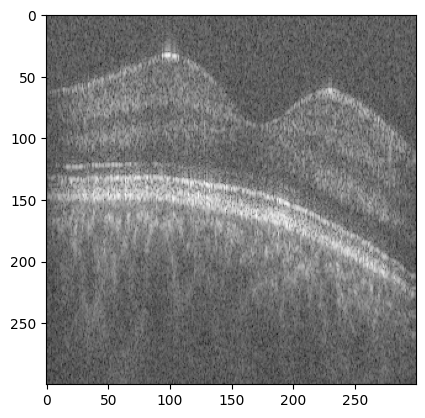

In [104]:
plt.imshow(raw_image_k, cmap='gray')

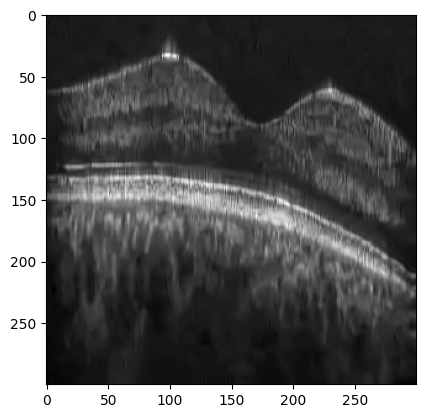

In [108]:
bm3d_image = bm3d_denoise(test_image_denoise, 18)
plt.imshow(bm3d_image, cmap='gray')

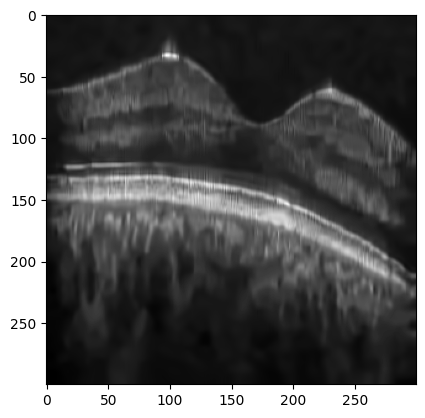

In [109]:
bm3d_more = bm3d_denoise(test_image_denoise,24)
svd_image = get_svd_image_from_array(bm3d_more)
plt.imshow(svd_image, cmap='gray')

In [110]:
plt.imsave(os.path.join(output_dir, 'svd_image.png'), svd_image, cmap='gray')
plt.imsave(os.path.join(output_dir, 'bm3d_image.png'), bm3d_image, cmap='gray')
plt.imsave(os.path.join(output_dir, 'raw_image.png'), raw_image_k, cmap='gray')

Super resolution

In [81]:
import cv2
import numpy as np

def get_bicubic_upsampled_array(image: np.array, width: int = 300, height: int = 300) -> np.array:
    return cv2.resize(image, (width, height), interpolation=cv2.INTER_CUBIC)

def get_bilinear_upsampled_array(image: np.array, width: int = 300, height: int = 300) -> np.array:
    return cv2.resize(image, (width, height), interpolation=cv2.INTER_LINEAR)

def get_nearest_upsampled_array(image: np.array, width: int = 300, height: int = 300) -> np.array:
    return cv2.resize(image, (width, height), interpolation=cv2.INTER_NEAREST)

def get_lanczos_upsampled_array(image: np.array, width: int = 300, height: int = 300) -> np.array:
    return cv2.resize(image, (width, height), interpolation=cv2.INTER_LANCZOS4)


For Pypeline,

In [150]:
test_image_pipeline = r"Dataset/ICIP_test_data_final/RawDataQA (10)/(157).tif"
test_image_pipeline = "D:/VIP Cup/Dataset/ICIP_test_data_final/RawDataQA (17)/(24).tif"
output_dir_pipeline = os.path.join(output_dir,'pipline')

sigma: 0.065


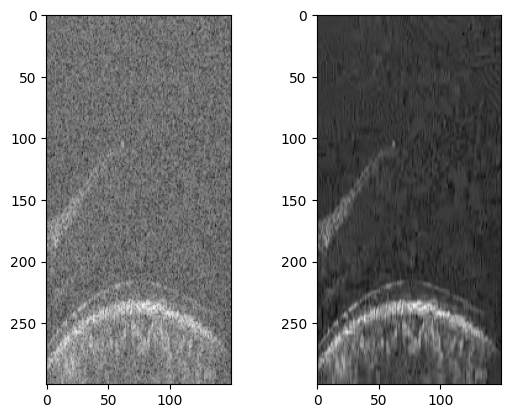

sigma: 0.075


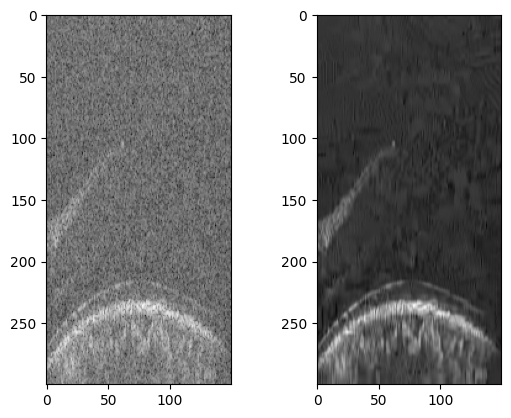

sigma: 0.08499999999999999


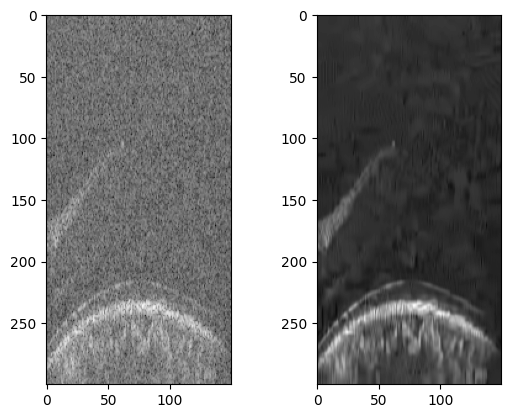

sigma: 0.09499999999999999


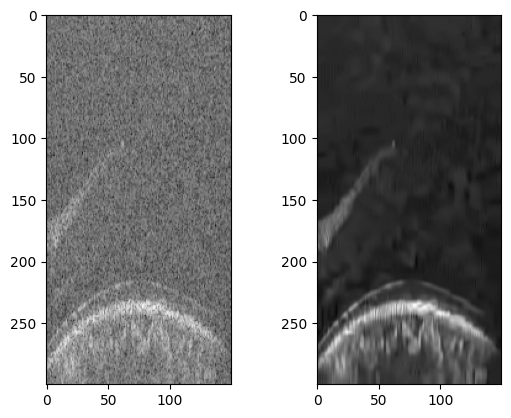

sigma: 0.10499999999999998


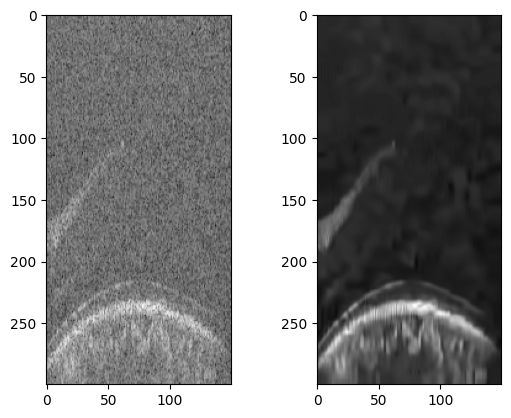

sigma: 0.11499999999999998


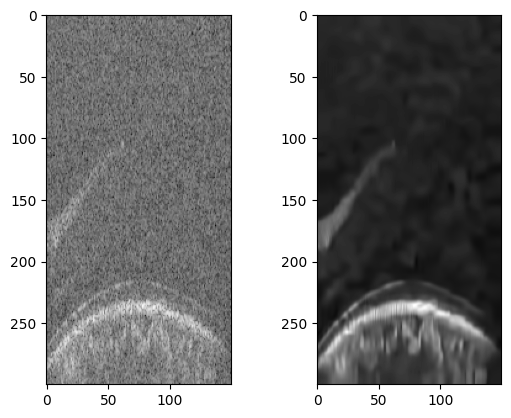

In [151]:
plain_img = img_as_float(io.imread(test_image_pipeline))

for i in (np.arange(0.065, 0.12, 0.01)):
    check = bm3d_denoise(test_image_pipeline, i)
    print(f"sigma: {i}")
    fig, ax = plt.subplots(1, 2)
    ax[0].imshow(plain_img, cmap='gray')
    ax[1].imshow(check, cmap='gray')
    plt.show()

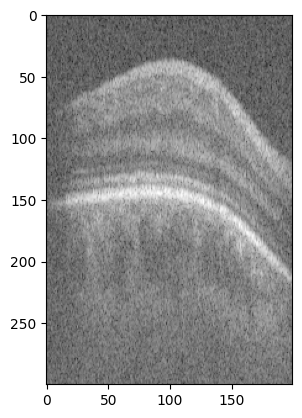

In [134]:
plain_img = cv2.imread(test_image_pipeline, cv2.IMREAD_GRAYSCALE)
plt.imsave(os.path.join(output_dir_pipeline, 'raw.png'), plain_img, cmap='gray')
plt.imshow(plain_img, cmap='gray')

Check  bm3d

In [ ]:
for i in range(15,29):
    check = bm3d_denoise(test_image_pipeline, i)
    print(f"sigma: {i}")
    fig, ax = plt.subplots(1, 2)
    ax[0].imshow(plain_img, cmap='gray')
    ax[1].imshow(check, cmap='gray')
    plt.show()

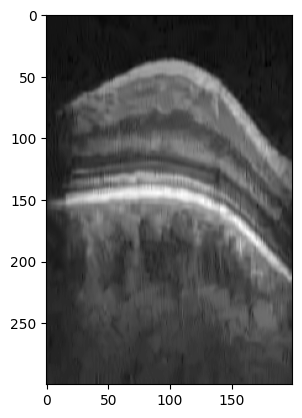

In [136]:

bm3d_pipeline_more= bm3d_denoise(test_image_pipeline, 16.5)
plt.imsave(os.path.join(output_dir_pipeline, 'svd.png'), bm3d_pipeline_more, cmap='gray')
plt.imshow(bm3d_pipeline_more  , cmap='gray')

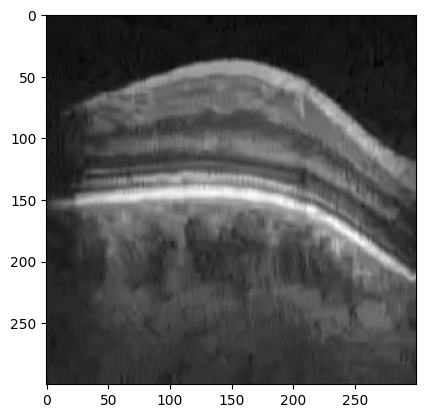

In [137]:

final_upsampled = get_bicubic_upsampled_array(bm3d_pipeline_more, 300, 300)  
plt.imsave(os.path.join(output_dir_pipeline, 'upsampled.png'), final_upsampled, cmap='gray')
plt.imshow(final_upsampled, cmap='gray')

In [82]:
# import cv2
# from cv2 import dnn_superres

# # Create an SR object
# opencv_sr = dnn_superres.DnnSuperResImpl_create()

# # Read the desired model
# opencv_model_path = "/content/EDSR_x2.pb"
# opencv_sr.readModel(opencv_model_path)

# # Set the desired model and scale to get correct pre- and post-processing
# opencv_sr.setModel("edsr", 2)

# def get_opencv_dl_upscaled_array(image: np.array, width: int = 300, height: int = 300) -> np.array:
#   resized_image = opencv_sr.upsample(image)
#   return get_bicubic_upsampled_array(resized_image, width, height)

Evaluating the model

raw_image_test = ope